In [127]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np

In [128]:
def get_annotations(json_fp):
    """
    Retrieves all annotations as DATETIME objects from a JSON file.

    Arguments:
        json_fp: Filepath where JSON annotations file is stored.

    Returns:
        spottings: List of all annotations (in order) as DATETIME objects.
    """

    # Retrieve from JSON file:
    oregon = json.load(open(json_fp,'r'))

    # For each annotation in raw_data, get DATETIME:
    annotations = oregon['annotations']
    spottings = []
    for key, value in annotations.items():
        if value['Date'] != '' and value['Time'] != '':
            time = datetime.strptime(value['Date'] + ' ' + value['Time'],
                                    '%Y-%m-%d %H:%M:%S')
            spottings.append([time, value['Direction']])
    return spottings

In [129]:
np.array(get_annotations('oregon.json'))[:,0]

array([datetime.datetime(2018, 3, 27, 13, 58),
       datetime.datetime(2018, 3, 27, 14, 37),
       datetime.datetime(2018, 3, 27, 14, 39),
       datetime.datetime(2018, 3, 27, 14, 40),
       datetime.datetime(2018, 3, 27, 14, 43),
       datetime.datetime(2018, 3, 27, 14, 51),
       datetime.datetime(2018, 3, 27, 15, 3),
       datetime.datetime(2018, 3, 27, 15, 4),
       datetime.datetime(2018, 3, 27, 15, 5),
       datetime.datetime(2018, 3, 27, 15, 6),
       datetime.datetime(2018, 3, 27, 15, 11),
       datetime.datetime(2018, 3, 27, 15, 13),
       datetime.datetime(2018, 3, 27, 15, 31),
       datetime.datetime(2018, 3, 27, 15, 35),
       datetime.datetime(2018, 3, 27, 15, 35),
       datetime.datetime(2018, 3, 27, 15, 35),
       datetime.datetime(2018, 3, 27, 15, 38),
       datetime.datetime(2018, 3, 27, 15, 54),
       datetime.datetime(2018, 3, 27, 16, 0),
       datetime.datetime(2018, 3, 27, 16, 15),
       datetime.datetime(2018, 3, 27, 16, 18),
       datetime.da

In [130]:
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)

Current size: [20.0, 9.0]


In [131]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

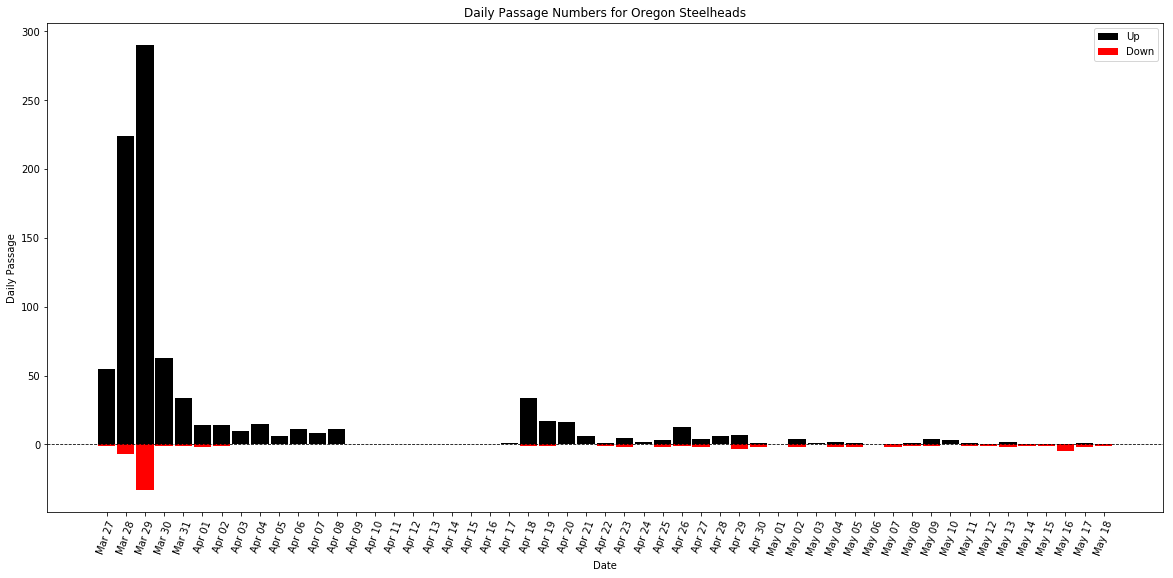

In [132]:
steelhead = get_annotations('oregon.json')
steelhead_date = np.array(steelhead)[:,0]
days_up = {}
days_down = {}
    
start_date = steelhead_date[0].date()
end_date = steelhead_date[-1].date() + timedelta(days=1)
for date in daterange(start_date, end_date):
    days_up[date.strftime('%b %d')] = 0
    days_down[date.strftime('%b %d')] = 0

for entry in steelhead:
    date = entry[0].strftime('%b %d')
    if entry[1] == "Up":
        days_up[date] += 1
    else:
        days_down[date] -= 1

plt.bar(days_up.keys(), days_up.values(), label='Up', color='black', align='center', width=0.9)
plt.bar(days_down.keys(), days_down.values(), label='Down', color='red', align='center', width=0.9)
plt.xticks(rotation=70)
plt.axhline(color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Daily Passage')
plt.title('Daily Passage Numbers for Oregon Steelheads')
plt.legend(loc='best')
plt.show()

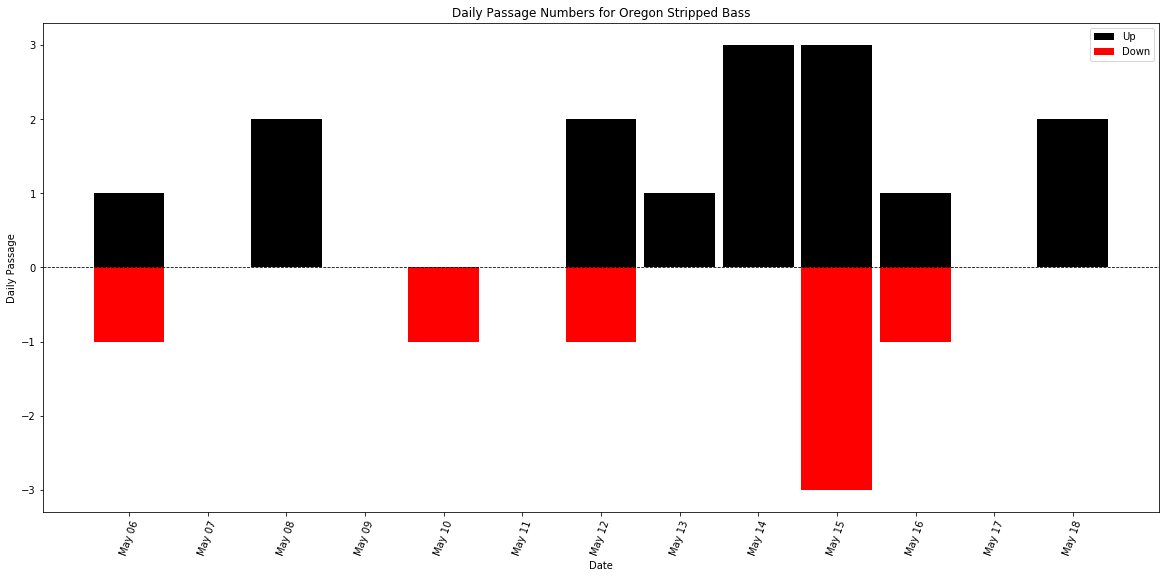

In [134]:
sb = get_annotations('stripped_bass.json')
sb_date = np.array(sb)[:,0]
days_up = {}
days_down = {}
    
start_date = sb_date[0].date()
end_date = sb_date[-1].date() + timedelta(days=1)
for date in daterange(start_date, end_date):
    days_up[date.strftime('%b %d')] = 0
    days_down[date.strftime('%b %d')] = 0

for entry in sb:
    date = entry[0].strftime('%b %d')
    if entry[1] == "Up":
        days_up[date] += 1
    else:
        days_down[date] -= 1

plt.bar(days_up.keys(), days_up.values(), label='Up', color='black', align='center', width=0.9)
plt.bar(days_down.keys(), days_down.values(), label='Down', color='red', align='center', width=0.9)
plt.xticks(rotation=70)
plt.axhline(color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Daily Passage')
plt.title('Daily Passage Numbers for Oregon Stripped Bass')
plt.legend(loc='best')
plt.show()